xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# Assignment: MNIST Dataset
### submitted by:
## Saeed Manavipour

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [1]:
from scipy import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import model_selection, metrics, linear_model,neighbors, tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
import xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = io.loadmat("C:/Users/saeed/Downloads/data/mnist-original.mat")
x, y = data['data'].T, data['label'].T

df_x=pd.DataFrame(x)
df_y=pd.DataFrame(y)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
### Question 1

Preprocess the data. Visualize one element from each class. Visualize the mean of each class.


In [3]:
###preprocessing the data we can see that they are no null values:
df_x.isnull().sum()
df_x.dropna(how='any').shape

(70000, 784)

Visualize one element from each class: 


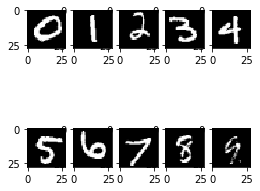

In [4]:
### in order to visualize images, we need to reshape each row of df_x into a matrix of 28x28
### (28*28=784). Chooisng different row numbers, we can find one image from each class 0 to 9:
print('Visualize one element from each class: ')
plt.rcParams['figure.figsize']=(4,4)
list1=[222,7777,14370,22000,26000,33000,38000,43000,53055,69666]
for i in range(len(list1)):    
    my_row=list1[i]
    plt.subplot(2, 5, i+1)
    info=df_x.iloc[my_row,:]
    my_image=info.values.reshape(28,28)
    plt.imshow(my_image,cmap='gray');

In [5]:
#creating a new data frame to get the mean for each class:
df_new=df_x.copy()
df_new['class']=df_y
df_mean=df_new.groupby('class').mean()

Visualize the mean of each class:


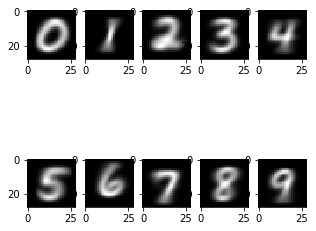

In [6]:
print('Visualize the mean of each class:')
plt.rcParams['figure.figsize']=(5,5)
for i in range(10):        
    plt.subplot(2, 5, i+1)
    info=df_mean.iloc[i,:]
    my_image=info.values.reshape(28,28)
    plt.imshow(my_image,cmap='gray');

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
### Question 2

Try fitting a logistic regression with its solver set to be the limited-memory variant of the Broyden-Fletcher-Goldfarb-Shannon algorithm. (If you'd like, you can try the other solvers/optimizers and observe the differences in computation time.)
•	What does reducing the dimensionality do to the computation time and why?
•	What does reducing the number of data points do to the computation time and why?
•	List one advantage and disadvantage of reducing dimensionality. List one advantage and disadvantage of reducing the number of data points.


In [7]:
## reducing dimensions using VarianceThreshold
select1 = VarianceThreshold(threshold=1000)
x = select1.fit_transform(df_x)
x.shape

(70000, 411)

In [8]:
### Spliting our data
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.1,test_size=0.1)
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(7000, 411)
(7000, 1)

(7000, 411)
(7000, 1)


In [9]:
###scaling out data using StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
### fitting regression model:
start_time = time.time()
my_regression = LogisticRegression(C=1.0,solver='lbfgs')
my_regression.fit(x_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

print('Train Score: ',my_regression.score(x_train,y_train))
print('Test Score:  ',my_regression.score(x_test,y_test))

--- 4.945006847381592 seconds ---


#### Answers:

Reducing dimensionality makes modeling faster and reduces computation time since we have less features to fit the model. The same goes for reducing number of data point, it takes less time to train the model.

Advantage of reducing dimensions or data points is reducing computation time, but the disadvantage is that we are using less data points and less features to train our model and as a result we are losing data which could result in lower accuracy scores.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
### Question 3



Use k-fold cross-validation for various values of k (try k from 1 to 15) with a KNN classifier to find the ideal number of neighbors to model the data.
•	What kind of accuracy are you getting? If you find this is taking too long for your computer you can subset the data to reduce the number of training points.

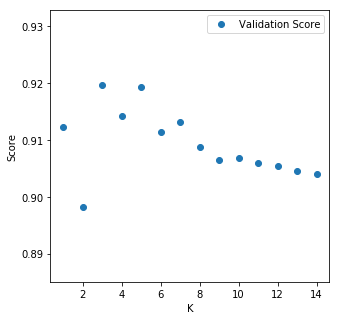

Best Model: K:  3
Accuracy:  0.9196907880703915


In [12]:
### since the comutation takes too long, we reduce train and test data points further:
### we use cross-validation of cv=5,
### we are running KNN_model for k from 1 to 15 and looking at train and test scores:

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.05,test_size=0.05)
validation_score_list = []
neighbors_range = np.arange(1,15)

for k in neighbors_range:  
    KNN_model = neighbors.KNeighborsClassifier(n_neighbors=k)
    validation_score = np.mean(cross_val_score(KNN_model, x_test,y_test, cv = 5))
    validation_score_list.append(validation_score)
plt.scatter(neighbors_range, validation_score_list,label="Validation Score")
plt.legend();
plt.xlabel('K');
plt.ylabel('Score');
plt.show();
print("Best Model: K: ", validation_score_list.index(np.max(validation_score_list))+1)
print('Accuracy: ',np.max(validation_score_list))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#### Question:

What happens to train and validation set accuracy if you set the K in your K-NN model to 1 (1-Nearest Neighbours) or to the number of training points (60000-Nearest Neighbours).
•	Can you explain what is going on and why it is happening?

In [13]:
### setting K to 1:
KNN_model = neighbors.KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)
print('Train Score: ',accuracy_score(y_train,KNN_model.predict(x_train)))
print('Test Score:  ',accuracy_score(y_test,KNN_model.predict(x_test)))

Train Score:  1.0
Test Score:   0.9245714285714286


In [14]:
### setting K to 3000(since here we are only using 3000 data points)
KNN_model = neighbors.KNeighborsClassifier(n_neighbors=3000)
KNN_model.fit(x_train,y_train)
print('Train Score: ',accuracy_score(y_train,KNN_model.predict(x_train)))
print('Test Score:  ',accuracy_score(y_test,KNN_model.predict(x_test)))

Train Score:  0.12285714285714286
Test Score:   0.12114285714285715


#### Answer:

Setting K to 1 we get 100% score for training since the model is memorizing the training data.

Setting K to 3000 we get terrible low values for scores. this is because the model is taking the average of all data points to predict the target.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#### Question:


Answer the previous question again but using decision trees where instead of controlling for K we control for the depth of the tree.


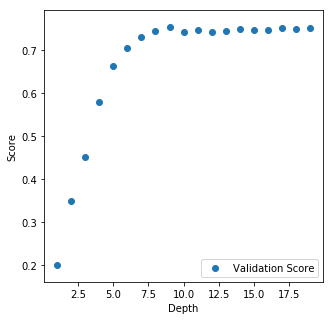

Best Model, Tree Depth:  9
Accuracy:  0.7528802237809417


In [15]:
### here we run the decision tree model for depth of 1 to 20:

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.05,test_size=0.05)
validation_score_list = []
tree_range=np.arange(1,20)

for n in tree_range:
    DT_model = tree.DecisionTreeClassifier(max_depth=n)
    validation_score = np.mean(cross_val_score(DT_model, x_test,y_test, cv = 5))
    validation_score_list.append(validation_score)
plt.scatter(tree_range, validation_score_list,label="Validation Score")
plt.legend();
plt.xlabel('Depth');
plt.ylabel('Score');
plt.show();
print("Best Model, Tree Depth: ", validation_score_list.index(np.max(validation_score_list))+1)
print('Accuracy: ',np.max(validation_score_list))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
### Question 4:

•	Fit a linear model, such as logistic regression or an SVM (to speed up training you can modify the default settings). Try to get as high an accuracy as possible on a validation set.
•	What does the class confusion matrix look like for your best model? Is there anything that stands out in it?

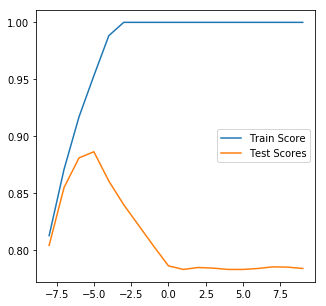

In [16]:
### first we want to see where we get high score on test data for linear regression
### we run linear regression while chaning hyper-parameter c:

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.05,test_size=0.05)
test_scores = []
train_scores = []
sample_range = [.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
               1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]

for i in np.array(sample_range) :    
    LR_model = linear_model.LogisticRegression(penalty='l2',C = i)
    LR_model.fit(x_train, y_train)
    train_scores.append(LR_model.score(x_train,y_train))
    test_scores.append(LR_model.score(x_test,y_test))

plt.plot(np.log10(sample_range), train_scores,label="Train Score")
plt.plot(np.log10(sample_range), test_scores,label="Test Scores")
plt.legend();
plt.show();

In [18]:
# so we choose C=0.00001 since it gives us the highest the highest accuracy:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.2,test_size=0.2)
LR_model = linear_model.LogisticRegression(C=0.00001)
LR_model.fit(x_train, y_train)
#Getting the score
print("Linear Model, train score: %3.3f" % (100 *LR_model.score(x_train, y_train)))
print("Linear Model, test score: %3.3f" % (100 *LR_model.score(x_test, y_test)))

Linear Model, train score: 92.693
Linear Model, test score: 90.300


In [20]:
confusion = confusion_matrix(y_test, LR_model.predict(x_test))
print(confusion)

[[1254    0    3    4    6    9    8    1   10    5]
 [   1 1577    4    8    0    3    3    0   14    0]
 [  13    7 1219   18   21   10   16   16   63    4]
 [   5    8   43 1278    0   43    6   18   41   13]
 [   3    6   12    1 1257    0    8    3   21   80]
 [  25    8    9   53   26 1033   35    3   52   27]
 [   9    5   21    0   11   31 1293    0   13    1]
 [   8    8   17    8   17    5    1 1326    6   68]
 [  19   25   25   35   12   37   12    8 1151   26]
 [   8    6    3   12   37    8    1   41   18 1254]]


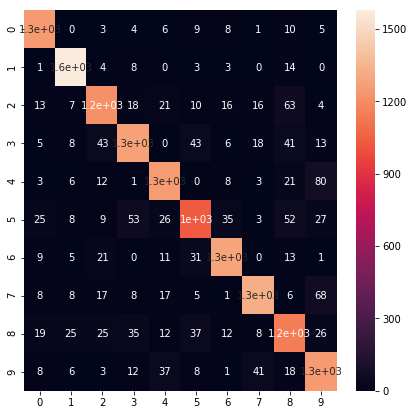

In [21]:
plt.rcParams['figure.figsize']=(7,7)
sns.heatmap(confusion, annot=True);

#### Answer:
Looking at confusion matrix above, we can see that digit 4 has been misclassified as 9, 80 times. 
Also 9 has been misclassified as 4, 37 times.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

#### Question

•	Re-fit a linear model that can discriminate between the digit 4 and the digit 9. Visualize the weights of the model as an image, does anything stand out?


In [22]:
## We need to create a data frame which only has two digit classes: 4 and 9,
## in order to do that we use df_new which had defined earlier: 

df_49=df_new[(df_new['class']==4)|(df_new['class']==9)] 

## then we define our new x and y from this data frame
y_49=(df_49['class']).values
del df_49['class']
x_49=df_49.values

In [23]:
print(x_49.shape)
print(y_49.shape)

(13782, 784)
(13782,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_49,y_49, train_size = 0.5,test_size=0.5)
LR_model = linear_model.LogisticRegression(C=0.00001)
LR_model.fit(x_train, y_train)
#Getting the score
print("Linear Model, train score: %3.3f" % (100 *LR_model.score(x_train, y_train)))
print("Linear Model, test score: %3.3f" % (100 *LR_model.score(x_test, y_test)))
print()
confusion = confusion_matrix(y_test, LR_model.predict(x_test))
print(confusion)


Linear Model, train score: 98.244
Linear Model, test score: 96.503

[[3257  123]
 [ 118 3393]]


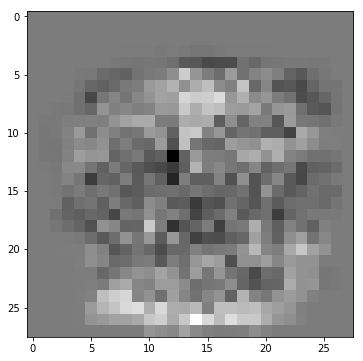

In [27]:
### plotting the weights:
weights=LR_model.coef_[0]
my_image=weights.reshape(28,28)
plt.rcParams['figure.figsize']=(6,6)
plt.imshow(my_image,cmap='gray');

In the plot above, where we have the highest coefficients we have darker pixels, lower coefficients correspond to white pixels.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### Question 5:

Your goal is to train a model that maximises the predictive performance (accuracy in this case) on this task.
Optimise your model's hyperparameters if it has any. Give evidence why you believe the hyperparameters that you found are the best ones.
Provide visualizations that demonstrate the model's performance.


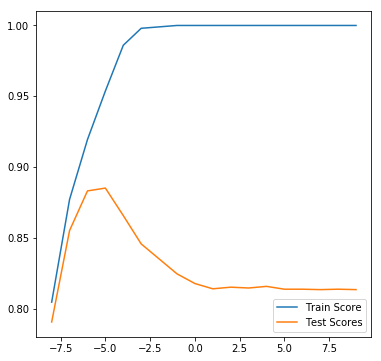

In [28]:
###using regression model while playing with C hyperparameter:

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.05,test_size=0.05)
test_scores = []
train_scores = []
sample_range = [.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
               1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]

for i in np.array(sample_range) :    
    my_regression = LogisticRegression(penalty='l2',C = i)
    my_regression.fit(x_train,y_train);    
    train_scores.append(my_regression.score(x_train,y_train))
    test_scores.append(my_regression.score(x_test,y_test))
plt.plot(np.log10(sample_range), train_scores,label="Train Score")
plt.plot(np.log10(sample_range), test_scores,label="Test Scores")
plt.legend();
plt.show();

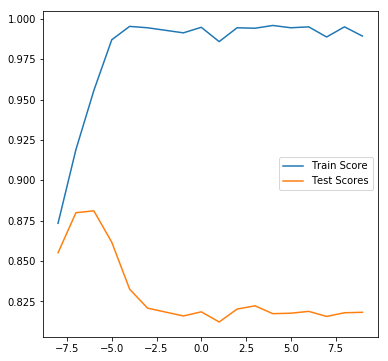

In [30]:
###using support vector machine (SVM) while playing with C hyperparameter:

test_scores = []
train_scores = []
sample_range = [.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
               1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]

for i in np.array(sample_range) :
    SVM_model = LinearSVC(C = i)    
    SVM_model.fit(x_train,y_train);    
    train_scores.append(SVM_model.score(x_train,y_train))
    test_scores.append(SVM_model.score(x_test,y_test))
plt.plot(np.log10(sample_range), train_scores,label="Train Score")
plt.plot(np.log10(sample_range), test_scores,label="Test Scores")
plt.legend();
plt.show();


In [149]:
### trying extreme gboost model:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.1,test_size=0.1)
XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)
print("XG Boost score: %3.3f" % (100 * XGB_model.score(x_test,y_test)))

XG Boost score: 92.143


Looking at results and models above, we can see that for logistic and linear regression C=0.00001, for SVM, C=0.0000005 and for Decision Tree, Depth =9 and for KNN, K=3 gave us highest possible accuracy scores.

We run the models again using optimized hyperparameters to compare their test accuracy:

In [150]:
my_regression = LogisticRegression(C=0.00001)
my_regression.fit(x_train,y_train); 
reg_score=100 *my_regression.score(x_test, y_test)

LR_model = linear_model.LogisticRegression(C=0.00001)
LR_model.fit(x_train, y_train)
lin_score=100 *LR_model.score(x_test, y_test)

DT_model = tree.DecisionTreeClassifier(max_depth=9)
DT_model.fit(x_train,y_train)
dt_score=100 *DT_model.score(x_test, y_test)

KNN_model = neighbors.KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train,y_train)
knn_score=100* accuracy_score(y_test,KNN_model.predict(x_test))

SVM_model = LinearSVC(C=0.0000005)
SVM_model.fit(x_train,y_train)
svm_score=100 * SVM_model.score(x_test,y_test)

xg_score=100 * (XGB_model.score(x_test,y_test))

In [151]:
results= {'Model': ['Regression', 'Linear','Decision Tree','KNN','SVM','XG Boost'], 
          'Accuracy': [reg_score, lin_score,dt_score,knn_score,svm_score,xg_score]}
df_results=pd.DataFrame(results)
df_results.head(10)

,Model,Accuracy
0,Regression,89.271429
1,Linear,89.271429
2,Decision Tree,78.228571
3,KNN,94.371429
4,SVM,89.185714
5,XG Boost,92.142857


Based on the results above, KNN and XG-Boost give us the highest test scores.